In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import calendar

IMPORT DES DONNER 

In [33]:
ComptageVeloNantes = pd.read_csv('./244400404_comptages-velo-nantes-metropole.csv',sep=';')
display(ComptageVeloNantes)

,Numéro de boucle,Libellé,Jour,00,01,02,03,04,05,06,...,20,21,22,23,Total,Probabilité de présence d'anomalies,Jour de la semaine,Boucle de comptage,Date formatée,Vacances
0,725,Pont Tabarly vers Sud,2023-11-28,1.0,0.0,0.0,1.0,0.0,1.0,2.0,...,28.0,16.0,8.0,2.0,593,NaN,2,0725 - Pont Tabarly vers Sud,2023-11-28,Hors Vacances
1,683,pont Anne de Bretagne vers Nord,2023-11-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Forte,2,0683 - pont Anne de Bretagne vers Nord,2023-11-28,Hors Vacances
2,667,Entrée pont Audibert vers Nord,2023-11-28,11.0,7.0,1.0,1.0,2.0,10.0,53.0,...,85.0,55.0,53.0,23.0,3110,NaN,2,0667 - Entrée pont Audibert vers Nord,2023-11-28,Hors Vacances
3,9998,NaN,2023-11-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Forte,2,9998 -,2023-11-28,Hors Vacances
4,1055,NaN,2023-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Forte,2,1055 -,2023-11-28,Hors Vacances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94407,680,Stalingrad vers ouest,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Forte,3,0680 - Stalingrad vers ouest,2020-01-01,Vacances de Noël
94408,746,Chemin de halage Tortière vers Sud,2020-01-01,0.0,1.0,0.0,3.0,3.0,0.0,3.0,...,0.0,2.0,0.0,0.0,102,NaN,3,0746 - Chemin de halage Tortière vers Sud,2020-01-01,Vacances de Noël
94409,847,Entrée pont Audibert vers Sud,2020-01-01,7.0,11.0,18.0,31.0,35.0,13.0,7.0,...,37.0,25.0,16.0,6.0,452,NaN,3,0847 - Entrée pont Audibert vers Sud,2020-01-01,Vacances de Noël
94410,945,Magellan vers Ouest,2020-01-01,3.0,0.0,4.0,7.0,5.0,0.0,1.0,...,6.0,0.0,3.0,0.0,87,NaN,3,0945 - Magellan vers Ouest,2020-01-01,Vacances de Noël


remplacer les valeur NAN de la colonne Probabilité de présence d'anomalies par Pas d'anomalie

In [34]:
ComptageVeloNantes["Probabilité de présence d'anomalies"]=ComptageVeloNantes["Probabilité de présence d'anomalies"].fillna("Pas d'anomalie")
display(ComptageVeloNantes)

,Numéro de boucle,Libellé,Jour,00,01,02,03,04,05,06,...,20,21,22,23,Total,Probabilité de présence d'anomalies,Jour de la semaine,Boucle de comptage,Date formatée,Vacances
0,725,Pont Tabarly vers Sud,2023-11-28,1.0,0.0,0.0,1.0,0.0,1.0,2.0,...,28.0,16.0,8.0,2.0,593,Pas d'anomalie,2,0725 - Pont Tabarly vers Sud,2023-11-28,Hors Vacances
1,683,pont Anne de Bretagne vers Nord,2023-11-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Forte,2,0683 - pont Anne de Bretagne vers Nord,2023-11-28,Hors Vacances
2,667,Entrée pont Audibert vers Nord,2023-11-28,11.0,7.0,1.0,1.0,2.0,10.0,53.0,...,85.0,55.0,53.0,23.0,3110,Pas d'anomalie,2,0667 - Entrée pont Audibert vers Nord,2023-11-28,Hors Vacances
3,9998,NaN,2023-11-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Forte,2,9998 -,2023-11-28,Hors Vacances
4,1055,NaN,2023-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Forte,2,1055 -,2023-11-28,Hors Vacances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94407,680,Stalingrad vers ouest,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Forte,3,0680 - Stalingrad vers ouest,2020-01-01,Vacances de Noël
94408,746,Chemin de halage Tortière vers Sud,2020-01-01,0.0,1.0,0.0,3.0,3.0,0.0,3.0,...,0.0,2.0,0.0,0.0,102,Pas d'anomalie,3,0746 - Chemin de halage Tortière vers Sud,2020-01-01,Vacances de Noël
94409,847,Entrée pont Audibert vers Sud,2020-01-01,7.0,11.0,18.0,31.0,35.0,13.0,7.0,...,37.0,25.0,16.0,6.0,452,Pas d'anomalie,3,0847 - Entrée pont Audibert vers Sud,2020-01-01,Vacances de Noël
94410,945,Magellan vers Ouest,2020-01-01,3.0,0.0,4.0,7.0,5.0,0.0,1.0,...,6.0,0.0,3.0,0.0,87,Pas d'anomalie,3,0945 - Magellan vers Ouest,2020-01-01,Vacances de Noël


Récupérer les donnée des  3 dérnier mois (novembre, octobre , septembre )

In [35]:
DateTroisMoisAvant = (pd.to_datetime('today') - pd.DateOffset(month=9)).strftime('%Y-%m-%d')

ComptageVeloNantesDernierMois= ComptageVeloNantes[ComptageVeloNantes['Jour']>=DateTroisMoisAvant]



Récupérer les Numéro de boucle  des  trois compteurs les plus passagers et les moins passagers sur l'ensemble des jours de comptage

In [46]:
totalParBoucle = ComptageVeloNantesDernierMois.groupby('Numéro de boucle')['Total'].sum().reset_index()
NumBoucleTop3Passagers = totalParBoucle.nlargest(3, 'Total')
NumBoucleBottom3Passagers = totalParBoucle.nsmallest(3, 'Total')

listNumeroDeBoucle = NumBoucleTop3Passagers['Numéro de boucle'].tolist()+NumBoucleBottom3Passagers['Numéro de boucle'].tolist() 



Récupérer les donnée des des  trois compteurs les plus passagers et les moins passagers sur l'ensemble des jours de comptage dans un seul dataframe 

In [37]:
ComptageVeloNantesDernierMoisfinal= ComptageVeloNantesDernierMois[ComptageVeloNantesDernierMois['Numéro de boucle'].isin(listNumeroDeBoucle)]
display(ComptageVeloNantesDernierMoisfinal)

,Numéro de boucle,Libellé,Jour,00,01,02,03,04,05,06,...,20,21,22,23,Total,Probabilité de présence d'anomalies,Jour de la semaine,Boucle de comptage,Date formatée,Vacances
1,683,pont Anne de Bretagne vers Nord,2023-11-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Forte,2,0683 - pont Anne de Bretagne vers Nord,2023-11-28,Hors Vacances
4,1055,NaN,2023-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Forte,2,1055 -,2023-11-28,Hors Vacances
33,785,50 Otages Vers Sud,2023-11-28,9.0,3.0,1.0,1.0,2.0,8.0,51.0,...,114.0,65.0,67.0,48.0,3496,Pas d'anomalie,2,0785 - 50 Otages Vers Sud,2023-11-28,Hors Vacances
56,788,50 Otages Vers Nord,2023-11-28,33.0,25.0,13.0,20.0,41.0,71.0,106.0,...,200.0,141.0,137.0,95.0,3914,Pas d'anomalie,2,0788 - 50 Otages Vers Nord,2023-11-28,Hors Vacances
57,890,Pont de Pirmil vers Sud,2023-11-28,10.0,8.0,3.0,1.0,11.0,21.0,52.0,...,144.0,64.0,58.0,35.0,3443,Pas d'anomalie,2,0890 - Pont de Pirmil vers Sud,2023-11-28,Hors Vacances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,1054,NaN,2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Forte,5,1054 -,2023-09-01,Vacances d'été
6010,1055,NaN,2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,Forte,5,1055 -,2023-09-01,Vacances d'été
6014,788,50 Otages Vers Nord,2023-09-01,116.0,85.0,50.0,39.0,52.0,50.0,59.0,...,277.0,189.0,132.0,93.0,3521,Pas d'anomalie,5,0788 - 50 Otages Vers Nord,2023-09-01,Vacances d'été
6027,683,pont Anne de Bretagne vers Nord,2023-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Forte,5,0683 - pont Anne de Bretagne vers Nord,2023-09-01,Vacances d'été


**Nombre de passages comptés total**

In [38]:
"""
    Calculer le nombre de passages total sur la période des 3 mois a nantes (on a pris les 3 top et 3 bottom compteur au vu du nombre de ligne de jeux de )
"""
NombreDePassagesComptésTotals = ComptageVeloNantesDernierMoisfinal['Total'].sum()
print("Nombre de passages comptés total")
print(NombreDePassagesComptésTotals)

Nombre de passages comptés total
783102


**Nombre de passages comptés moyen par jour**

In [39]:
"""
Calculer le Nombre de passages comptés moyen par jour 
faire la moyenne de la colonne Total 
"""
ComptageVeloNantesDernierMoisfinal.loc[:, 'Jour'] = pd.to_datetime(ComptageVeloNantesDernierMoisfinal['Jour'])

dateDeDebut = ComptageVeloNantesDernierMoisfinal['Jour'].max()
dateDeFin = ComptageVeloNantesDernierMoisfinal['Jour'].min()
NombreDeJour = (dateDeDebut-dateDeFin).days
NombreDePassagesMoyenParJour = int (NombreDePassagesComptésTotals / NombreDeJour)
print('Nombre de passages comptés moyen par jour:')
print(NombreDePassagesMoyenParJour)


Nombre de passages comptés moyen par jour:
8898


**Nombre de passages moyen journalier ouvrable**


Il s'agit de la moyenne journalière des comptages effectués les Mardis et Jeudis hors vacances scolaires

In [40]:
"""
1- Filtrer les données pour inclure uniquement les Mardis et Jeudis
2- Exclure les jours de vacances scolaires 
3- calculer le nombre des jour hors vacance scolaire 
4- Calculer la moyenne journalière des passages pour les jours ouvrables
"""

ComtageVeloNantesJourOuvrable = ComptageVeloNantesDernierMoisfinal[ComptageVeloNantesDernierMoisfinal['Jour de la semaine'].isin([2,4])]
ComtageVeloNantesJourOuvrable = ComtageVeloNantesJourOuvrable[ComtageVeloNantesJourOuvrable['Vacances']=='Hors Vacances']
NombreDeJourhorsVacanceScolaire = ComtageVeloNantesJourOuvrable['Jour'].drop_duplicates().count()

NombreDePassagesJournalierOuvrable = int(ComtageVeloNantesJourOuvrable['Total'].sum()/NombreDeJourhorsVacanceScolaire)
print('Nombre de passages moyen journalier ouvrable')
print(NombreDePassagesJournalierOuvrable)

Nombre de passages moyen journalier ouvrable
10802


**les 3 compteurs les plus passagers**

In [41]:
"""
1- regrouper les valeur de dataframe dans un dataframe par Boucle de comptage 
2- récupérer les meilleur boucle de passage avec la fonction pandas.nlargest()
3- affichage des résuleta  
"""

compteurs  = ComptageVeloNantesDernierMoisfinal.groupby('Boucle de comptage')['Total'].sum().reset_index()
CompteursTop3Passagers = compteurs.nlargest(3, 'Total')

print('les 3 compteurs les plus passagers')
for index, row in CompteursTop3Passagers.iterrows():
    formatted_total = f"{row['Total']:,}".replace(',', ' ')
    print(f"{row['Boucle de comptage']} : {formatted_total}")

les 3 compteurs les plus passagers
0788 - 50 Otages Vers Nord : 317 482
0785 - 50 Otages Vers Sud : 236 635
0890 - Pont de Pirmil vers Sud : 229 273


**Pourcentage de comptages ayant une probabilité d'erreur**

In [42]:
"""
1- Calculer le nombre d'occurrences de chaque valeur dans la colonne 'Probabilité de présence d'anomalies'
2-  Calculer le pourcentage d'occurrence pour chaque catégorie
3- affichage des résuleta  
"""

totalcomptages= len(ComptageVeloNantesDernierMoisfinal)


occurrences = ComptageVeloNantesDernierMoisfinal['Probabilité de présence d\'anomalies'].value_counts()

pourcentageForte = (occurrences.get('Forte', 0) / totalcomptages) * 100
pourcentageFaible = (occurrences.get('Faible', 0) / totalcomptages) * 100

print('Pourcentage de comptages ayant une probabilité d\'erreur')
print(f"Pourcentage 'Faible':, {pourcentageFaible:.2f}%")
print(f"Pourcentage 'Forte':, {pourcentageForte:.2f}%")
print(f"Sur {totalcomptages} comptages")



Pourcentage de comptages ayant une probabilité d'erreur
Pourcentage 'Faible':, 0.94%
Pourcentage 'Forte':, 48.69%
Sur 534 comptages


**Nombre de vélos comptés par jour de l'année**

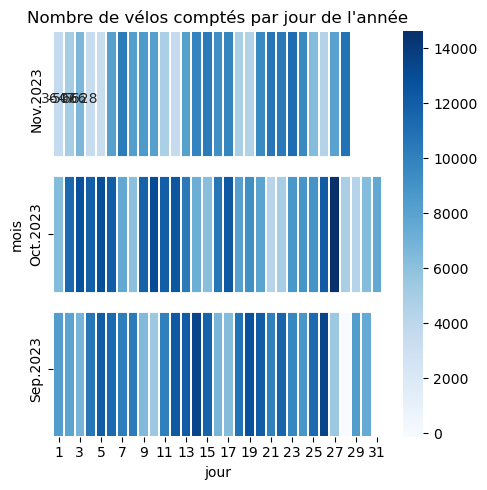

In [43]:
"""
1- Création de la colonne 'Numéro du jour'
2- Création de la colonne 'Mois_Formaté'
3- Groupement des données 
4- réer une nouvelle figure pour la heatmap avec des espaces entre les mois
5-affichage de heatmap
"""

# Copie du DataFrame pour éviter le SettingWithCopyWarning
ComptageVeloNantesDernierMoisfinal = ComptageVeloNantesDernierMoisfinal.copy()
# Conversion de la colonne 'Jour' en datetime
ComptageVeloNantesDernierMoisfinal['Jour'] = pd.to_datetime(ComptageVeloNantesDernierMoisfinal['Jour'])


ComptageVeloNantesDernierMoisfinal['Numéro du jour'] = ComptageVeloNantesDernierMoisfinal['Jour'].dt.day



ComptageVeloNantesDernierMoisfinal['Mois_Formaté'] = ComptageVeloNantesDernierMoisfinal['Jour'].dt.strftime('%b.%Y')

ComptageVeloNantesDernierMoisfinal = ComptageVeloNantesDernierMoisfinal.fillna(0)


df = ComptageVeloNantesDernierMoisfinal.groupby(['Mois_Formaté', 'Numéro du jour'])['Total'].sum()


# Redimensionner les données pour les utiliser dans une heat map
heatmap_data = df.unstack(level=1)

# Créer une nouvelle figure pour la heatmap avec des espaces entre les mois
plt.figure(figsize=(5, 5))

# Tracer la heatmap principale
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g', linewidths=0.003, linecolor='white')

# Ajouter des lignes blanches entre les mois
num_months = len(heatmap_data.columns)

plt.hlines(np.arange(1, len(heatmap_data.index)), 0, num_months, colors='white', linewidth=15)

plt.xlabel('jour')
plt.ylabel('mois')
plt.title('Nombre de vélos comptés par jour de l\'année')
plt.tight_layout()
plt.show()

**Nombre de velos comptés par jour de la semaine**


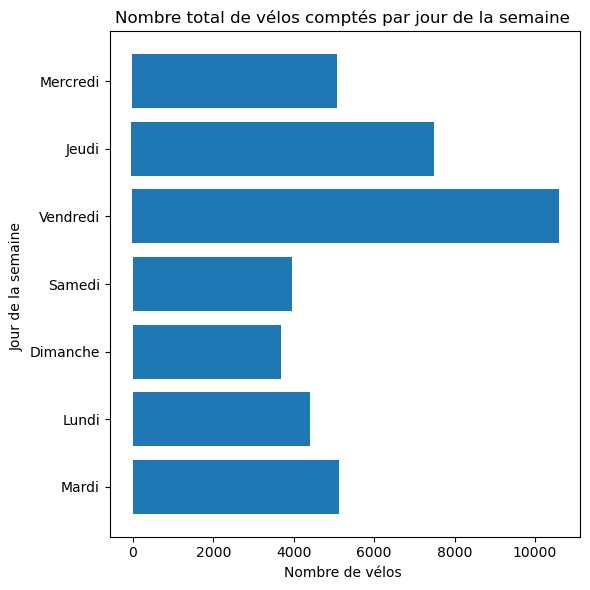

In [44]:
"""
1- ajout de la colonne de Lb_jours qui continent les nom des jour 
2- Calcule de nombre des vélo par jour 
3- Création du graphique
"""


map_jours_fr = {
    1: 'Lundi',
    2: 'Mardi',
    3: 'Mercredi',
    4: 'Jeudi',
    5: 'Vendredi',
    6: 'Samedi',
    7: 'Dimanche'
}

ComptageVeloNantesDernierMoisfinal.loc[:, 'lb_jour'] = ComptageVeloNantesDernierMoisfinal['Jour de la semaine'].map(map_jours_fr)




ComptageVeloNantesDernierMoisfinal = ComptageVeloNantesDernierMoisfinal.fillna(0)





VélosCompteParJourDeLaSemaine = ComptageVeloNantesDernierMoisfinal.groupby('lb_jour')['Total'].sum()




# Création du graphique
plt.figure(figsize=(6, 6))
plt.barh(ComptageVeloNantesDernierMoisfinal['lb_jour'],ComptageVeloNantesDernierMoisfinal['Total'])
plt.xlabel('Nombre de vélos ')
plt.ylabel('Jour de la semaine ')
plt.title('Nombre total de vélos comptés par jour de la semaine ')
plt.tight_layout()

# Affichage du graphique
plt.show()



**Nombre de vélos comptés par heure de la journée**

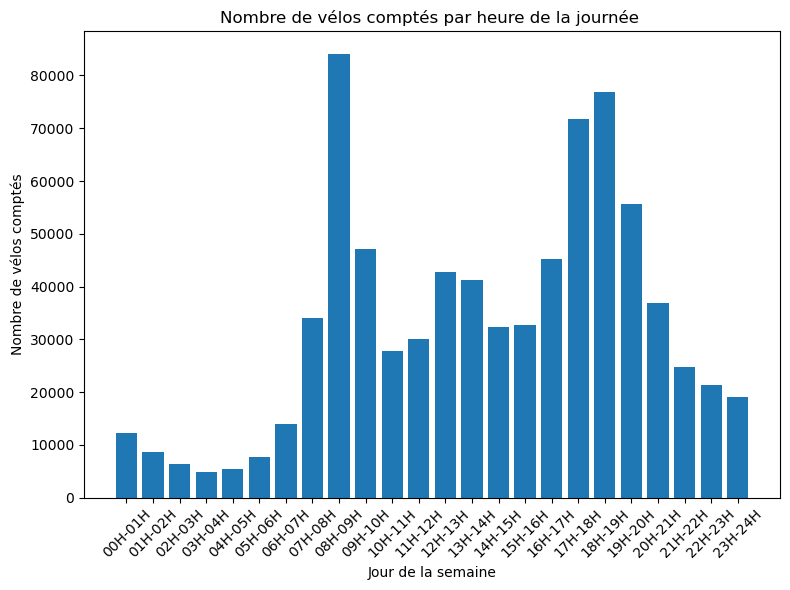

In [45]:


"""
1- creation dataframe avec les heur et le nombre de velo par heurs 
2- renomer les colonne avec le type '00H-01H' 
3- Création du graphique
"""
ComptageVeloNantesParHeurs = ComptageVeloNantesDernierMoisfinal[['00', '01', '02', '03', '04', '05', '06', '07','08', '09', '10', '11', '12', '13', '14', '15','16', '17','18', '19', '20', '21', '22', '23']].sum()
ComptageVeloNantesParHeurs = ComptageVeloNantesParHeurs.astype(int)
nouveauxNomsColonnes = {
    '00': '00H-01H',
    '01': '01H-02H',
    '02': '02H-03H',
    '03': '03H-04H',
    '04': '04H-05H',
    '05': '05H-06H',
    '06': '06H-07H',
    '07': '07H-08H',
    '08': '08H-09H',
    '09': '09H-10H',
    '10': '10H-11H',
    '11': '11H-12H',
    '12': '12H-13H',
    '13': '13H-14H',
    '14': '14H-15H',
    '15': '15H-16H',
    '16': '16H-17H',
    '17': '17H-18H',
    '18': '18H-19H',
    '19': '19H-20H',
    '20': '20H-21H',
    '21': '21H-22H',
    '22': '22H-23H',
    '23': '23H-24H'
}

ComptageVeloNantesParHeurs = ComptageVeloNantesParHeurs.rename(nouveauxNomsColonnes)

plt.figure(figsize=(8, 6))
plt.bar(ComptageVeloNantesParHeurs.index, ComptageVeloNantesParHeurs.values)
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de vélos comptés')
plt.title('Nombre de vélos comptés par heure de la journée ')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()
